### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
loan_data = pd.read_csv('loan.csv')

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the Shape of the Data
loan_data.shape

(39717, 111)

In [6]:
# there are 39717 Rows and 111 Columns

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
#Check the number of null values in the columns
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Based on the information and Null values will work on data cleaning activity

In [9]:
# There are a lot of columns with all null values. Let's first remove them
loan_data.dropna(axis = 1, how = 'all', inplace = True)

# removes any columns in the loan_data DataFrame that consist entirely of missing values (NaN). 
# The original DataFrame is modified directly, with these columns being permanently removed.

In [10]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
# it is observed that more than 50 columns removed as we were having null values for entire column.


## There are several columns contains only single value. 
- They cannot contribute to our analysis in any way. So removing them.
  
  For Ex.
- pymnt_plan has only n as value
- initial_list_status has only f
- collections_12_mths_ex_med - 0
- policy_code - 1
- policy_code - 1
- application_type - Individual
- acc_now_delinq - 0
- chargeoff_within_12_mths - 0
- delinq_amnt - 0
- pub_rec_bankruptcies - 0,1,2
- tax_liens - 0

In [12]:
# checking for columns with single or only 1 values in entire column
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [13]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code', 'application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)

In [14]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


### Now we have 47 columns out of which some correspond to the post approval of loan
- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- removing columns corresponding to this
- Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". which are not required for analysis 
- "desc" has description (text data) which is also not required for analysis, So removing the column.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them. 
- "funded_amnt" vs "funded_amnt_inv" , we can remove one of the column as has the same meaning.

### List of post-approval features
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- mths_since_last_delinq
- mths_since_last_record

In [15]:
loan_data.drop(["id", "member_id", "url", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [16]:
loan_data.shape

(39717, 22)

In [17]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  title                39706 non-null  object 
 15  dti                  39717 non-null 

In [18]:
# remaining columns
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [19]:
# checking for null values.
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.027696
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

## Handling Missing values
 - columns with missing values are "emp_length", "revol_util", and title. 
 - So before doing that, lets see what kind of data each column has. 

In [20]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [21]:
# Missing values are in very low percentage. So imputung with mode value will not affect the analysis much. (Mode values is higher with next freq.)
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [22]:
#Dropping null values for title and revol_util
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

In [23]:
loan_data.dropna(axis = 0, subset = ['title'] , inplace = True)
loan_data.title.isna().sum()

0

In [24]:
loan_data.shape

(39656, 22)

## Standardizing the data 
- "revol_util" and "int_rate" column described as an object column, it has continous values. so converting it to int
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }


In [25]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [26]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [27]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
#After running this code, the emp_length column will contain numeric values (e.g., 10, 0, 5), which can be more easily used in analysis or modeling.

In [28]:
loan_data.head() 

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,title,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,Computer,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,bike,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,real estate business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,personel,20.00,Feb-96,1,10,0,21.0,37
4,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,...,Current,other,Personal,17.94,Jan-96,0,15,0,53.9,38


In [29]:
# "term" is arguable to be an integer,there are only two values (36 months and 60 months) in the whole column and can be a categorical variable.
loan_data['term'].value_counts()

term
 36 months    29042
 60 months    10614
Name: count, dtype: int64

## Checking Outliers

To check outliers Box plot is the best way

<Axes: ylabel='annual_inc'>

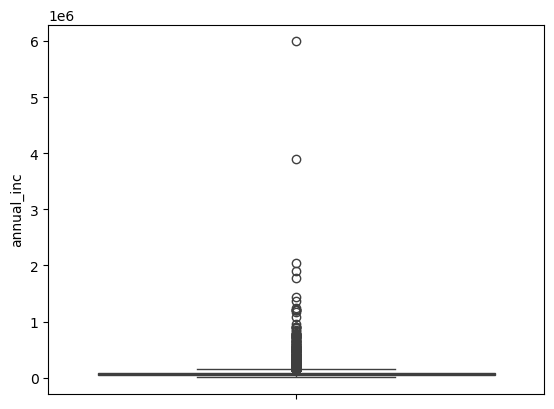

In [30]:
sns.boxplot(loan_data['annual_inc'])

In [31]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82401.0
0.90    116000.0
0.95    142000.0
0.97    165996.0
0.98    187000.0
0.99    234997.8
Name: annual_inc, dtype: float64

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [32]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<Axes: ylabel='annual_inc'>

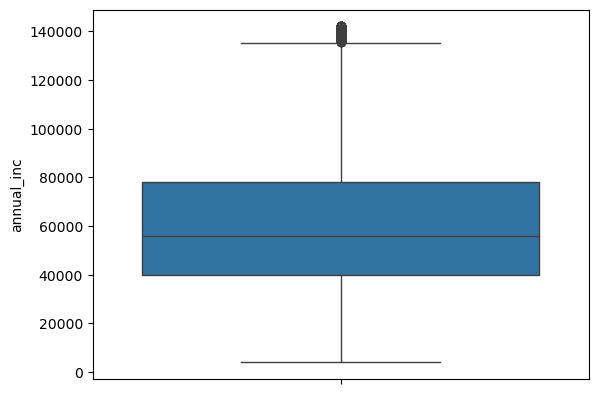

In [33]:
sns.boxplot(loan_data.annual_inc)

### Now the "annual_inc" data looks good and proceeding next.
- Analyzing other numerical variables which could possibly have outliers.
    
- dti
- loan_amnt
- funded_amnt_inv 

<Axes: ylabel='dti'>

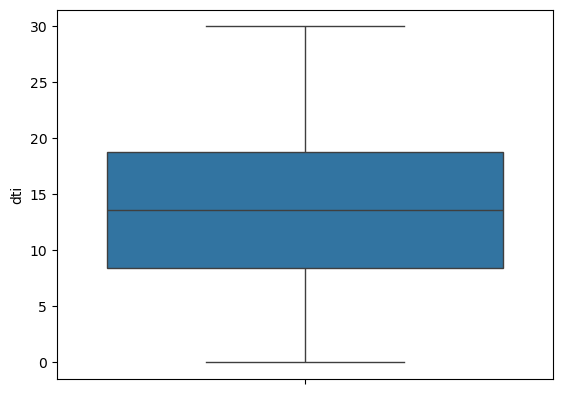

In [34]:
sns.boxplot(loan_data.dti)

In [35]:
# No Outliers for dti

<Axes: ylabel='loan_amnt'>

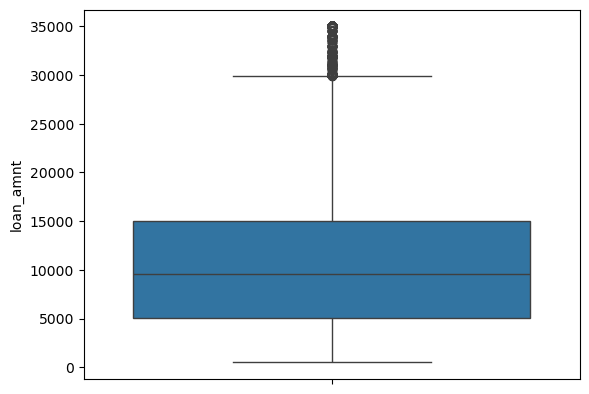

In [36]:
sns.boxplot(loan_data.loan_amnt)

In [37]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20500.0
0.950    25000.0
0.970    27000.0
0.975    29000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [38]:
#no major changes, we cna consider this data without outliers

<Axes: ylabel='funded_amnt_inv'>

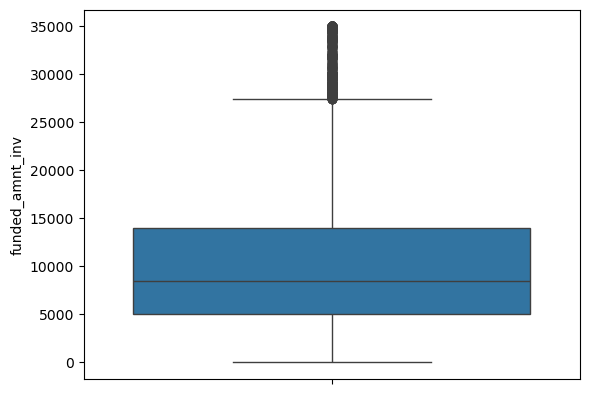

In [39]:
sns.boxplot(loan_data.funded_amnt_inv)

In [40]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8500.000000
0.750    13975.000000
0.900    19925.000000
0.950    24000.000000
0.970    25000.000000
0.975    26349.023492
0.980    28202.171274
0.985    29975.000000
0.990    33232.702827
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

#### All these distributions are pretty continousand there is no need to remove outliers / extreme values for these columns

### The goal of the analysis is to analyze the charged off customers based on various scenarios.
- For this purpose, we will exclude current loans. 

In [41]:
loan_data = loan_data[~(loan_data['loan_status'] == 'Current')]

In [42]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Visualizing Categorical Data 

<Axes: xlabel='loan_status', ylabel='count'>

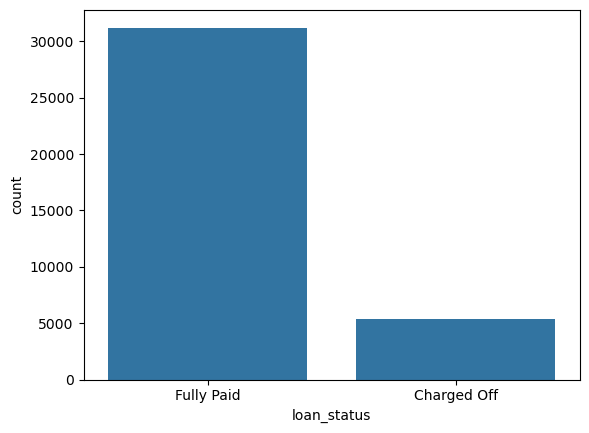

In [43]:
sns.countplot(x = 'loan_status', data = loan_data)

In [44]:
# As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

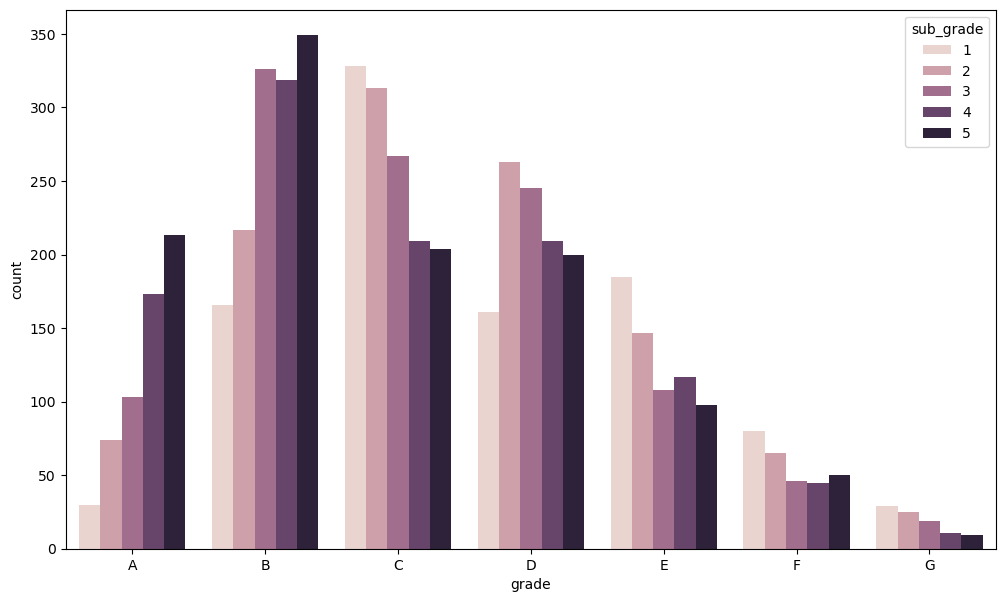

In [45]:
# We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

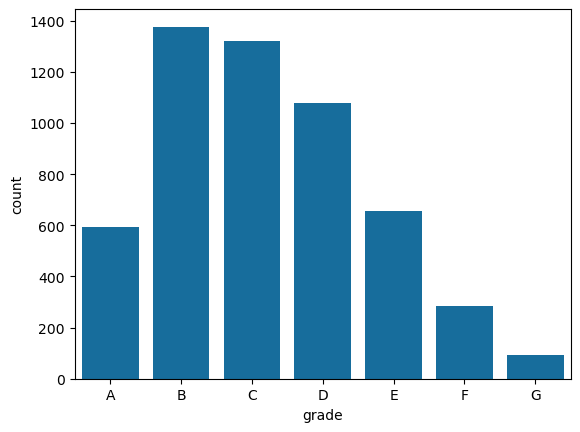

In [46]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

##  Analyzing home_ownership

In [47]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [48]:
loan_data.home_ownership.value_counts()

home_ownership
RENT        18001
MORTGAGE    15688
OWN          2847
OTHER          91
NONE            3
Name: count, dtype: int64

In [49]:
# There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [50]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [51]:
loan_data.home_ownership.value_counts()

home_ownership
RENT        18001
MORTGAGE    15688
OWN          2847
OTHER          94
Name: count, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

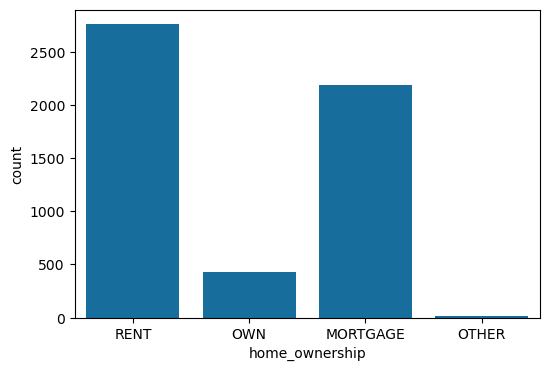

In [52]:
# visualization of the data
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

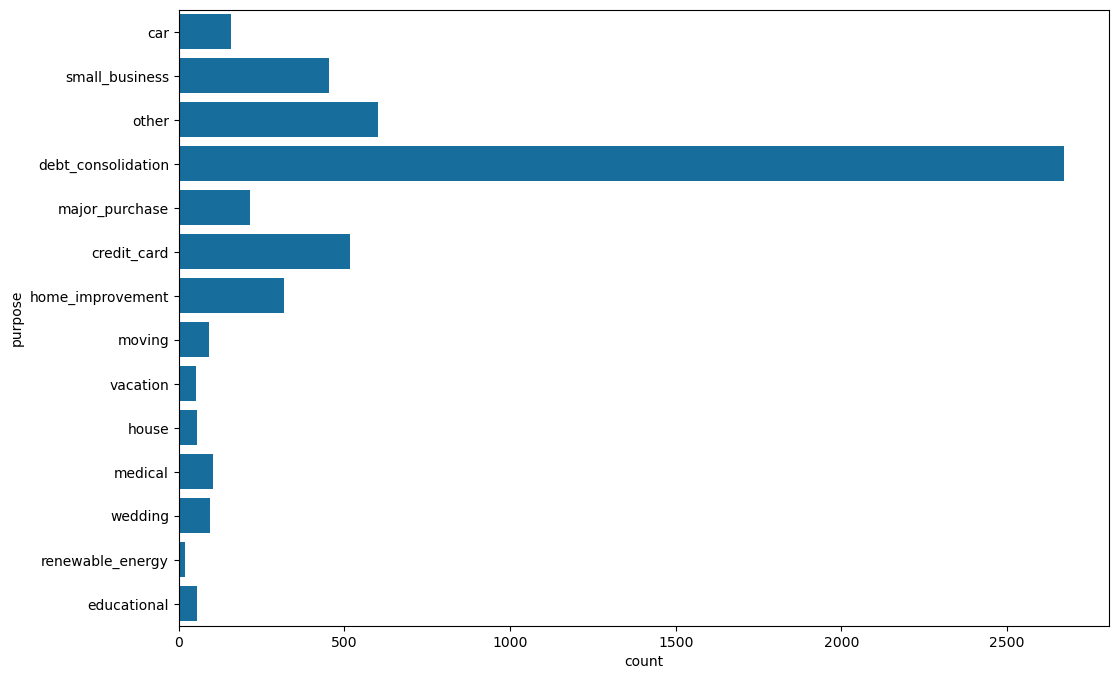

In [53]:
# Analyzing purpose
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [54]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [55]:
# Viewing new bins created
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


Text(0.5, 0, 'Interest Rate')

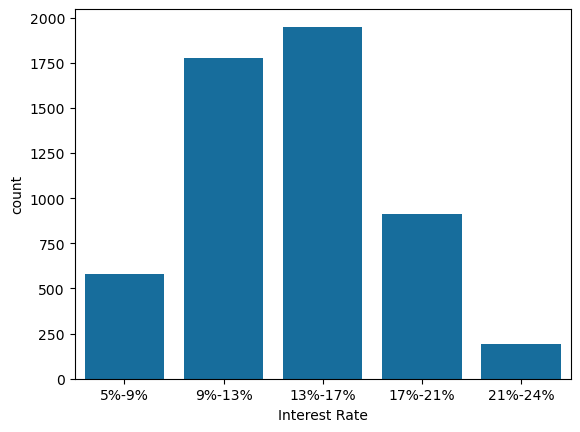

In [56]:
# Analyzing interest rate wrt the interest rate bins created
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')


<Axes: xlabel='emp_length', ylabel='count'>

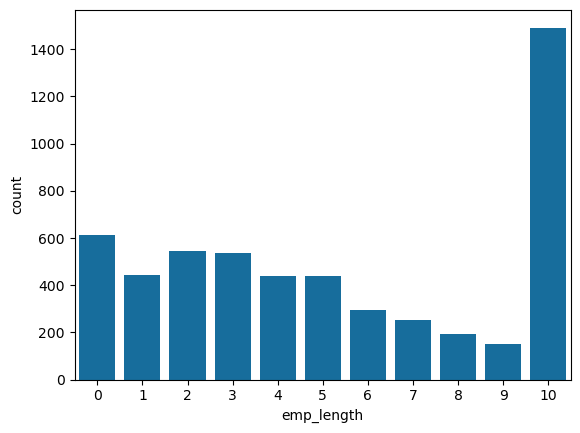

In [57]:
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

#### Similarly analyzing open_acc, revol_util, total_acc, annual_inc

<Axes: xlabel='open_acc_groups', ylabel='count'>

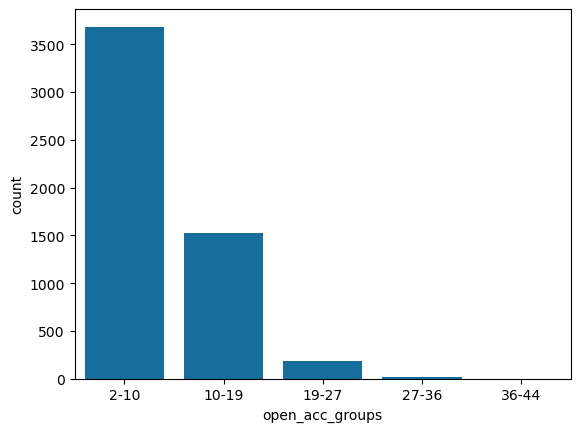

In [58]:
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

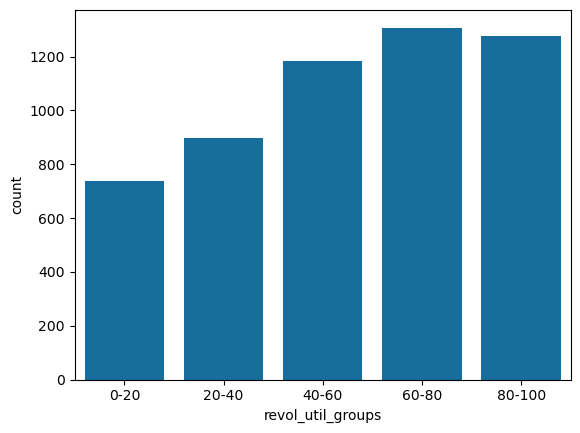

In [59]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

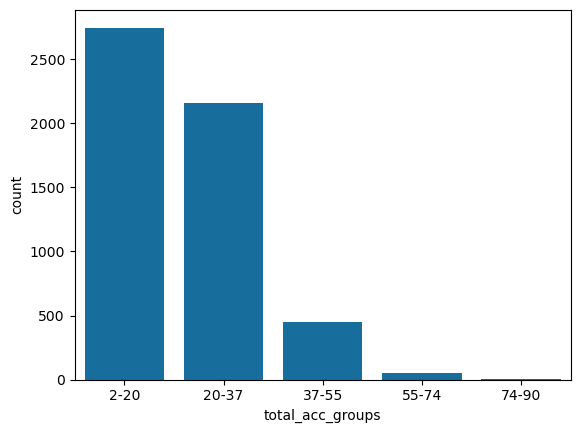

In [60]:
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

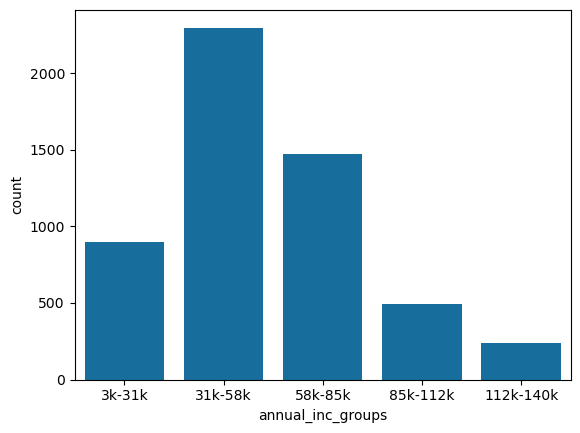

In [61]:
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='term', ylabel='count'>

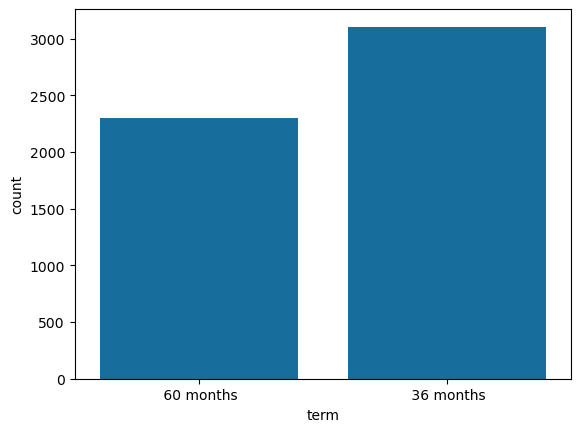

In [62]:
sns.countplot(x='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

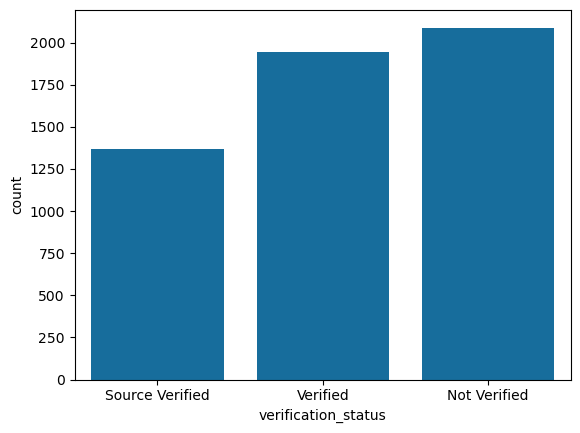

In [63]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

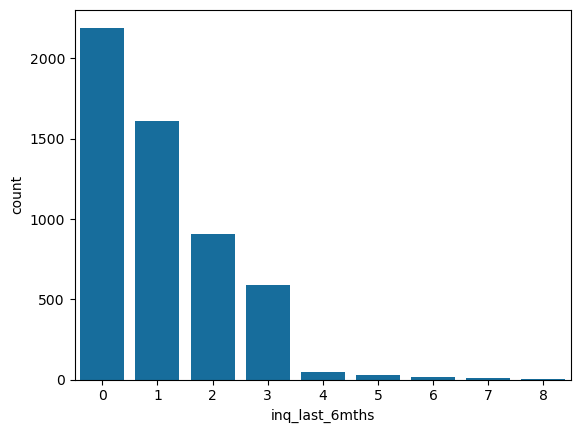

In [64]:
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

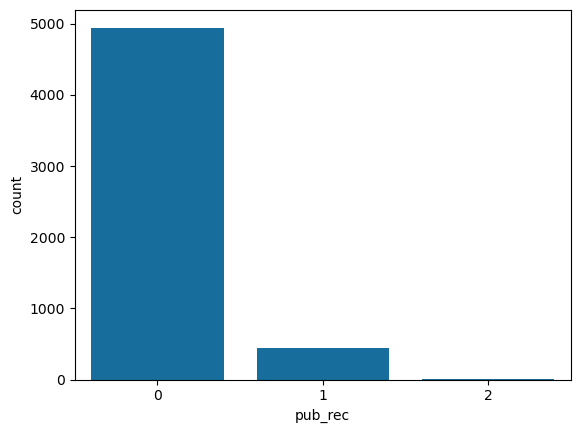

In [65]:
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

## Analyzing by issued month and year


In [66]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [67]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

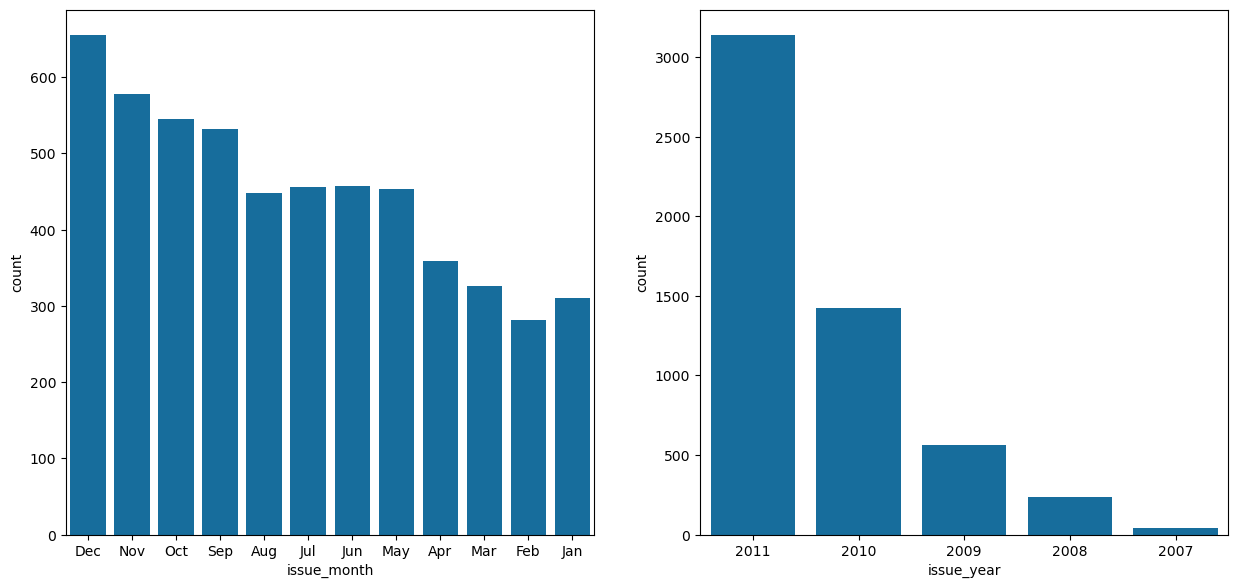

In [68]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

### Above analysis shows that Maximum number of defaults occured when the loan was sanctioned/issued in Dec. 
- Loan issued in the year 2011 were also hacing high defaulters as compared to other years


In [69]:
# Creating group for Installement, funded amount, loan amount and dti
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=9,precision =0,labels=['14-150','150-300','300-450','450-600','600-750','750-900','900-1050','1050-1200','1200-1350'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

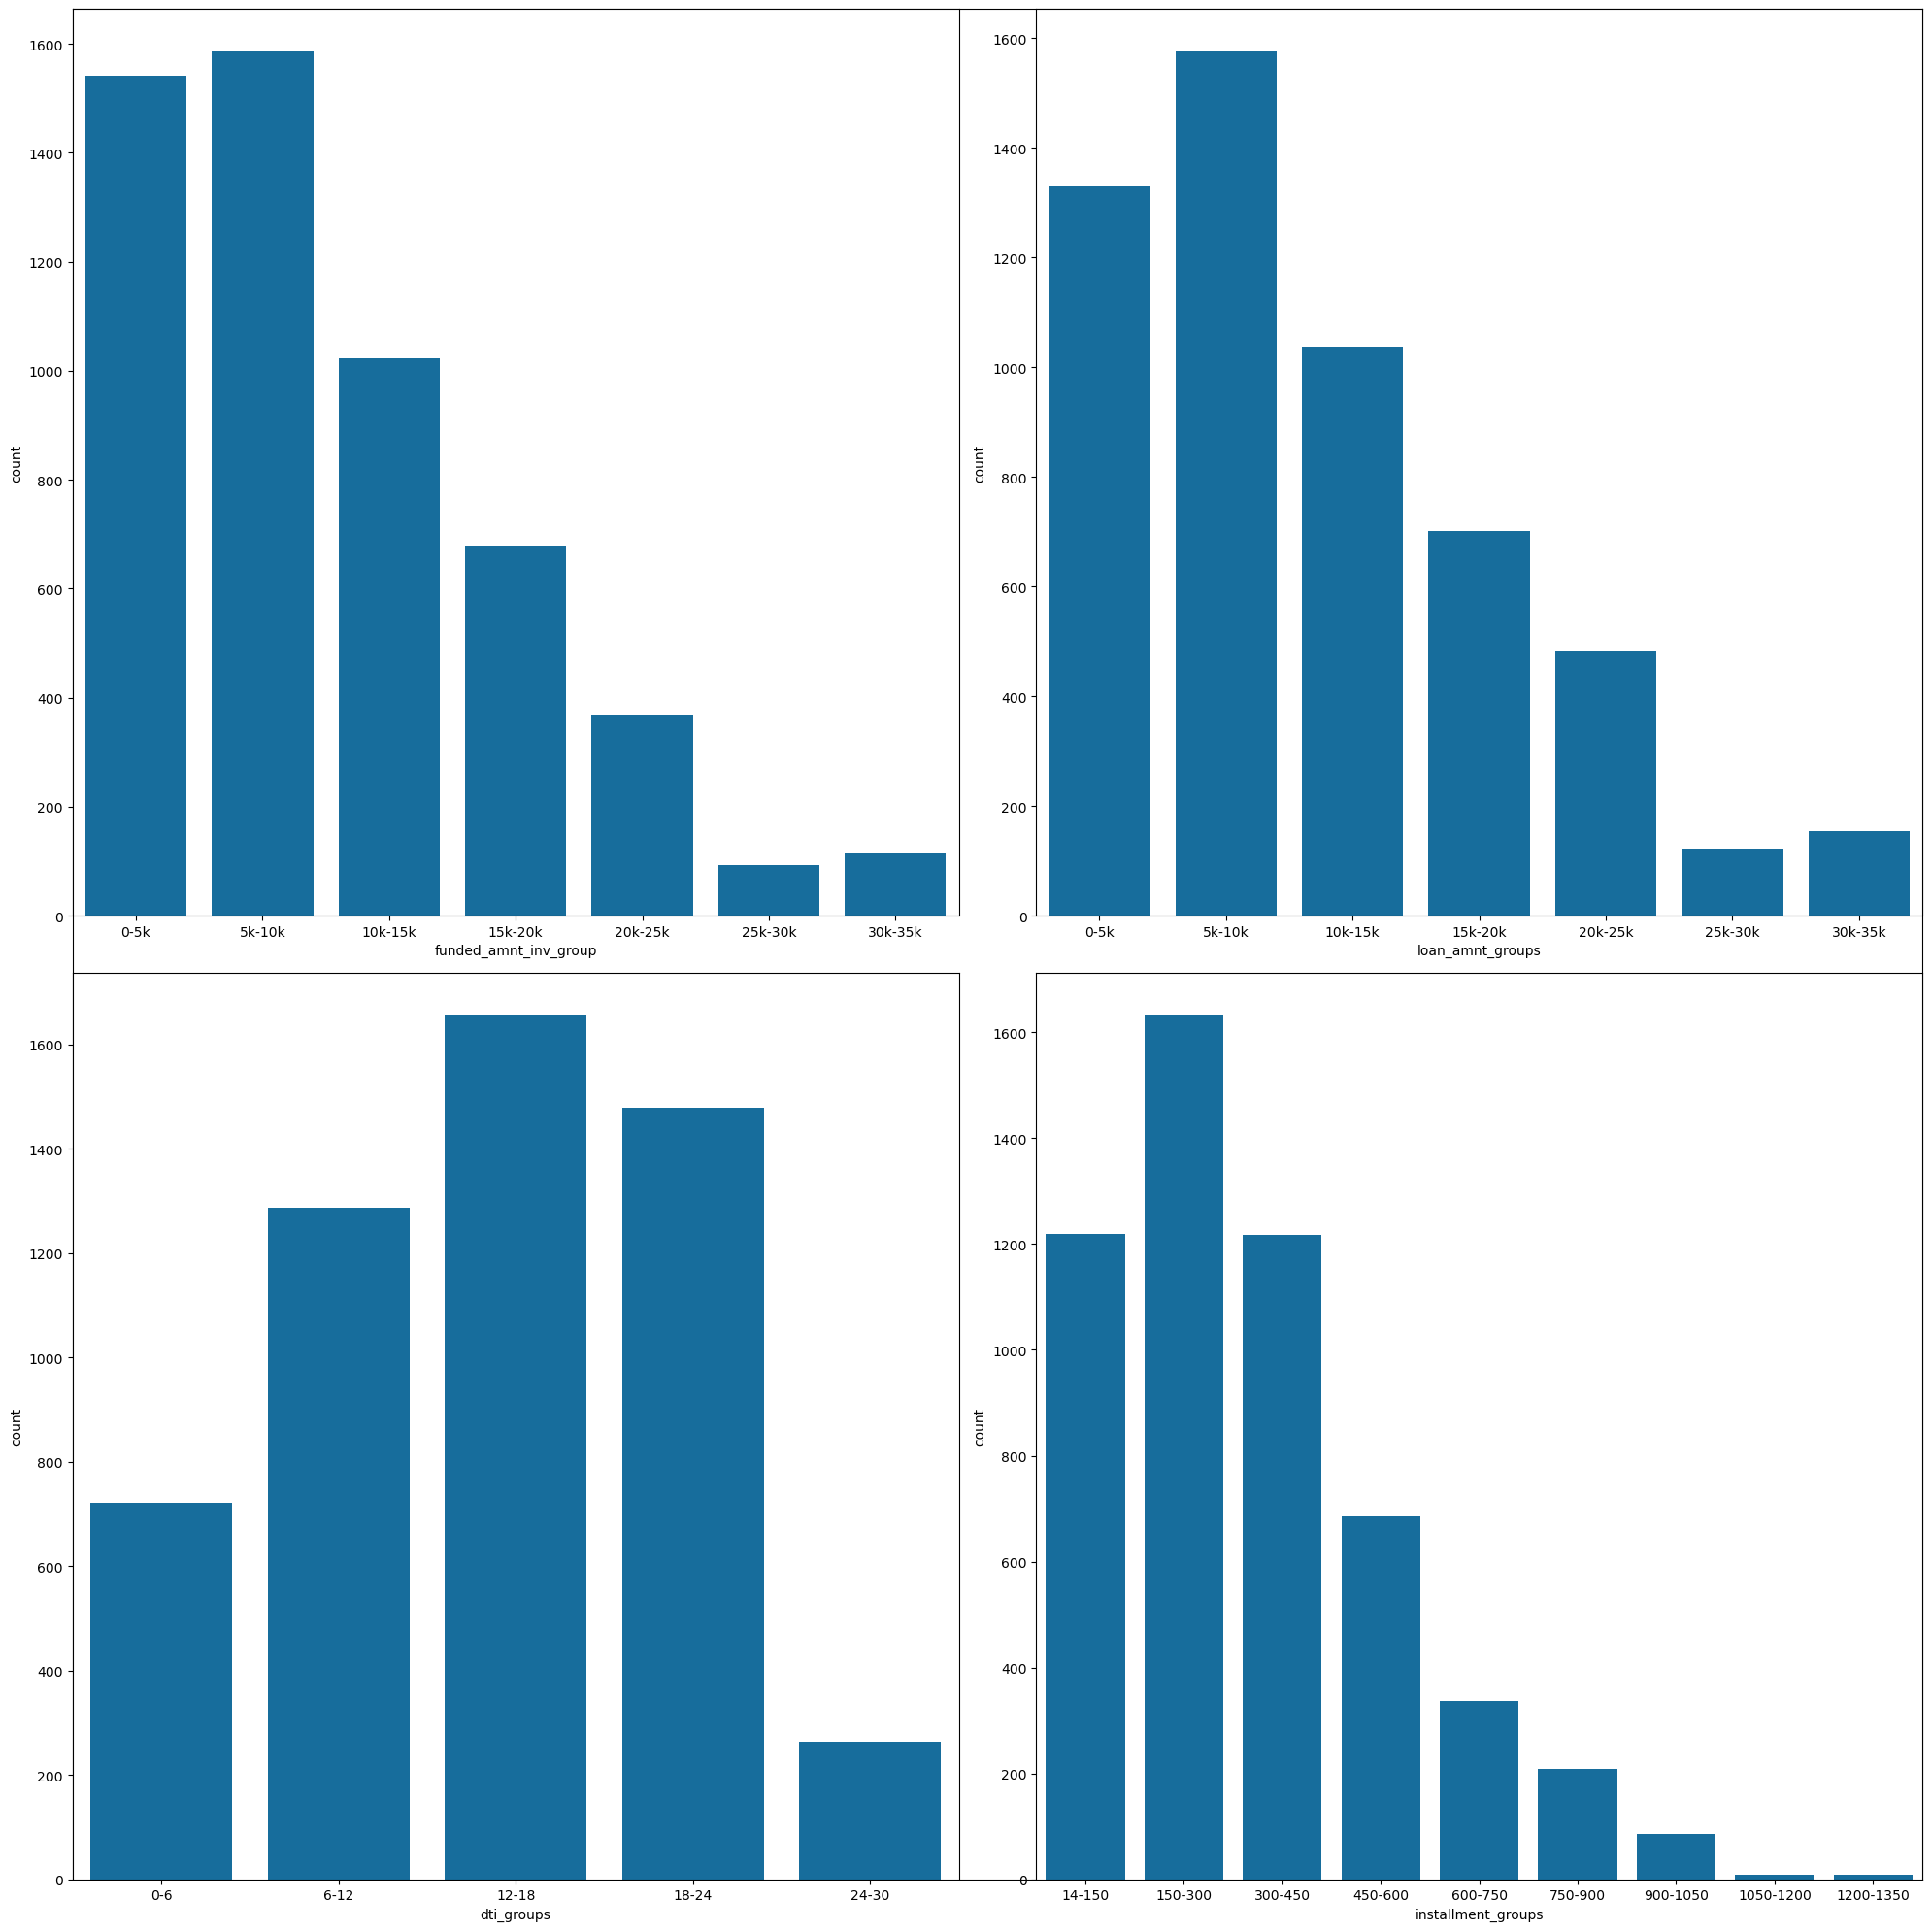

In [70]:
fig,ax = plt.subplots(figsize = (20,20))
plt.xticks([])  # Remove x-ticks
plt.yticks([])  # Remove y-ticks
plt.subplot(2, 2, 1) 
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(2, 2, 2)
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(2, 2, 3)
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(2, 2, 4)
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Observations

### The above analysis using count plots with respect to the charged off loans for each variable suggests the following. There will be more probability of defaulting when : 

- Grade is 'B'
- And a total grade of 'B5' level.
- Applicants having house_ownership as 'RENT' - Count is highest and more than 2500
- Applicants who use the loan to clear other debts - debt consolidation is high
- Applicants who receive interest at the rate of 13-17% - near 2000
- Applicants who have an income of range 31k - 58k - more than 2000
- Applicants who have 2-10 open_acc
- Applicants with employement length of 10
- Loan term 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- sanctioned in 2011 or in dec month
- When funded amount by investor is between 5k-10k
- Loan amount is between 5k - 10k
- Dti is between 12-18
- When monthly installments are between 150-300

###### The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)

### Analysing annual income with other columns

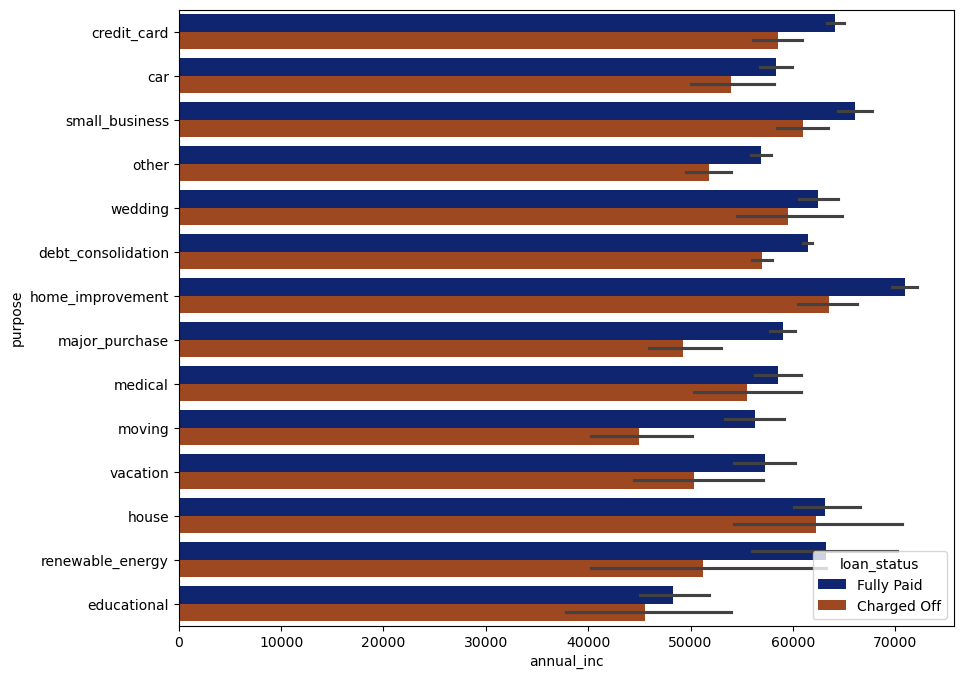

In [71]:
# Annual income vs loan purpose

plt.figure(figsize=(10,8))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="dark")
plt.show()

#### Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

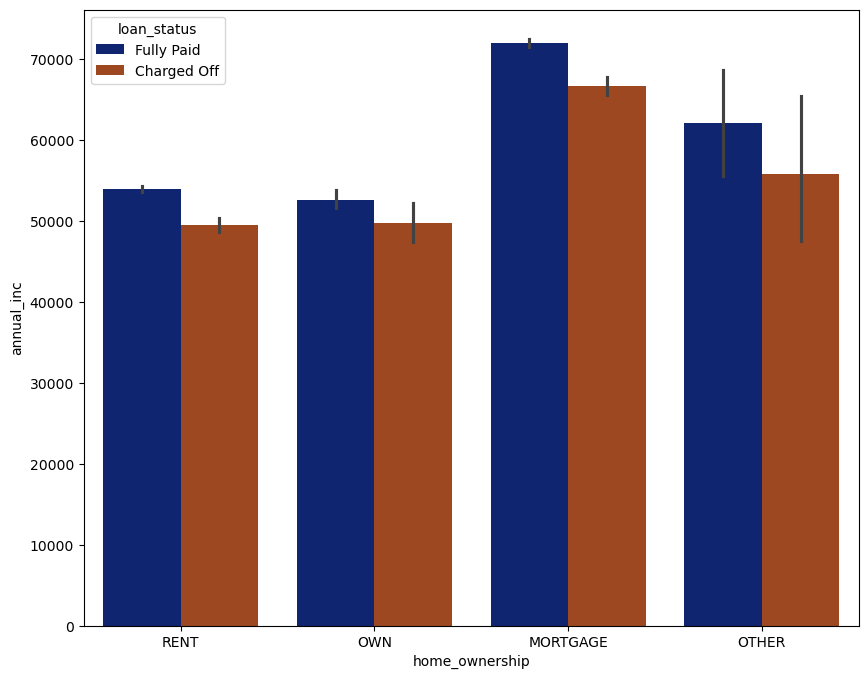

In [72]:
# Annual income vs home ownership
plt.figure(figsize=(10,8))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="dark")
plt.show()

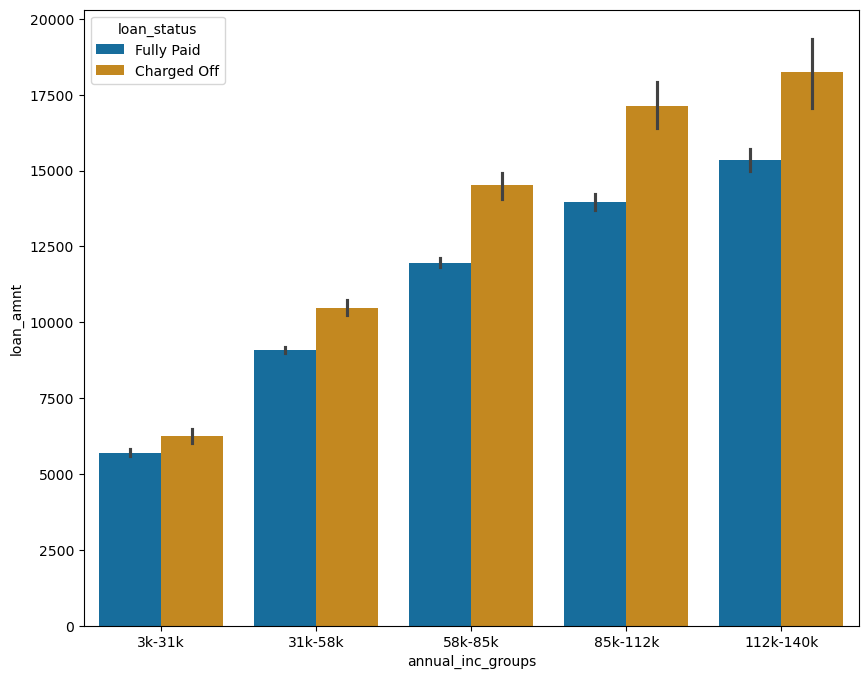

In [73]:
# Annual Income vs Loan amount
plt.figure(figsize=(10,8))
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)
plt.show()

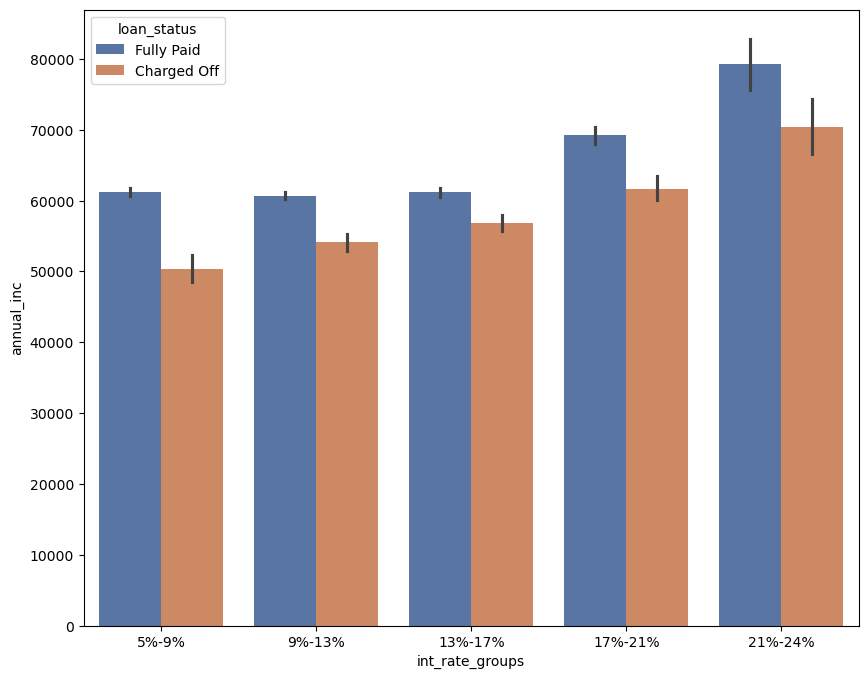

In [74]:
# Annual income vs int_rate
plt.figure(figsize=(10,8))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="deep")
plt.show()

### Analysing loan_amount with other columns

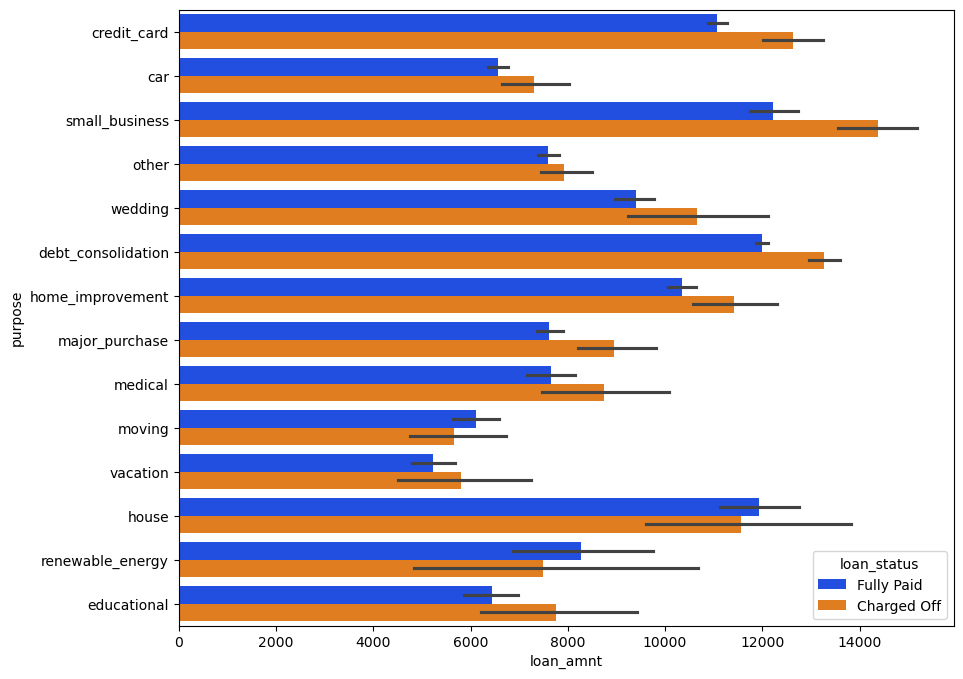

In [75]:
# Loan vs Loan purpose
plt.figure(figsize=(10,8))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="bright")
plt.show()

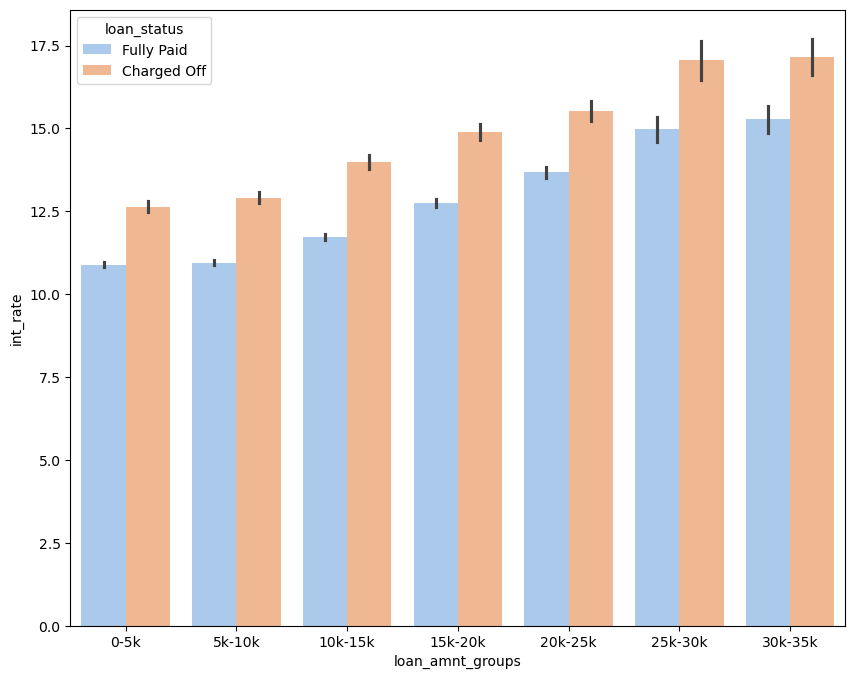

In [76]:
# Loan Amount vs Interest Rate
plt.figure(figsize=(10,8))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

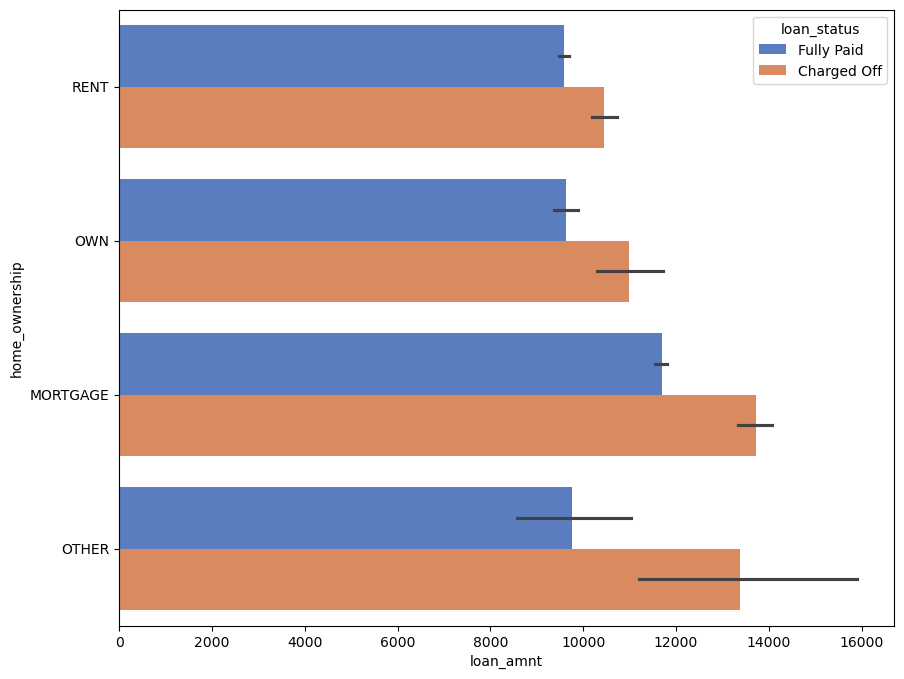

In [77]:
# Loan vs House Ownership
plt.figure(figsize=(10,8))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="muted")
plt.show()

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

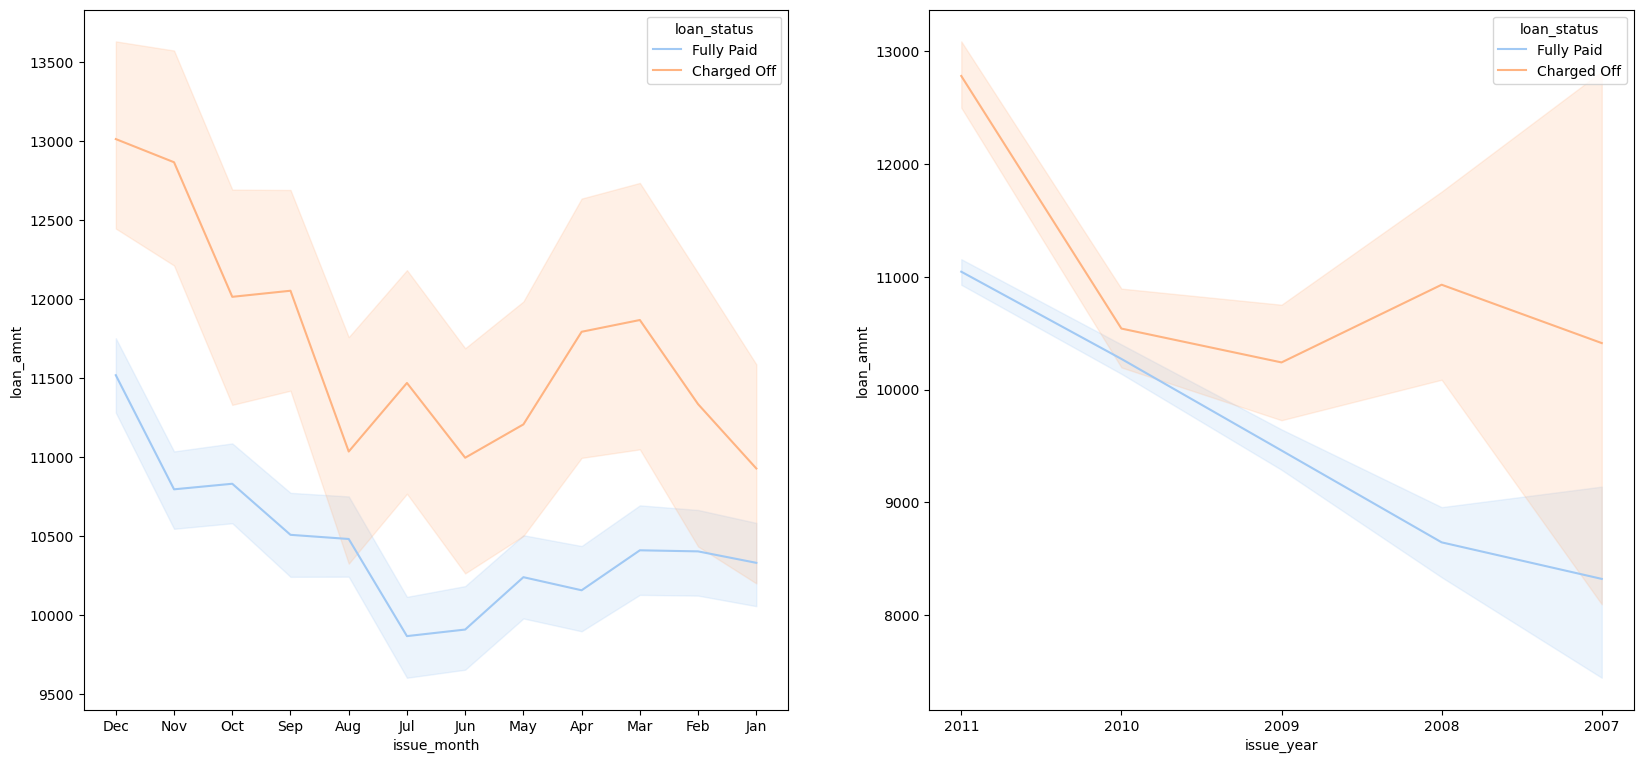

In [78]:
# Loan amount vs month issued and year issued
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

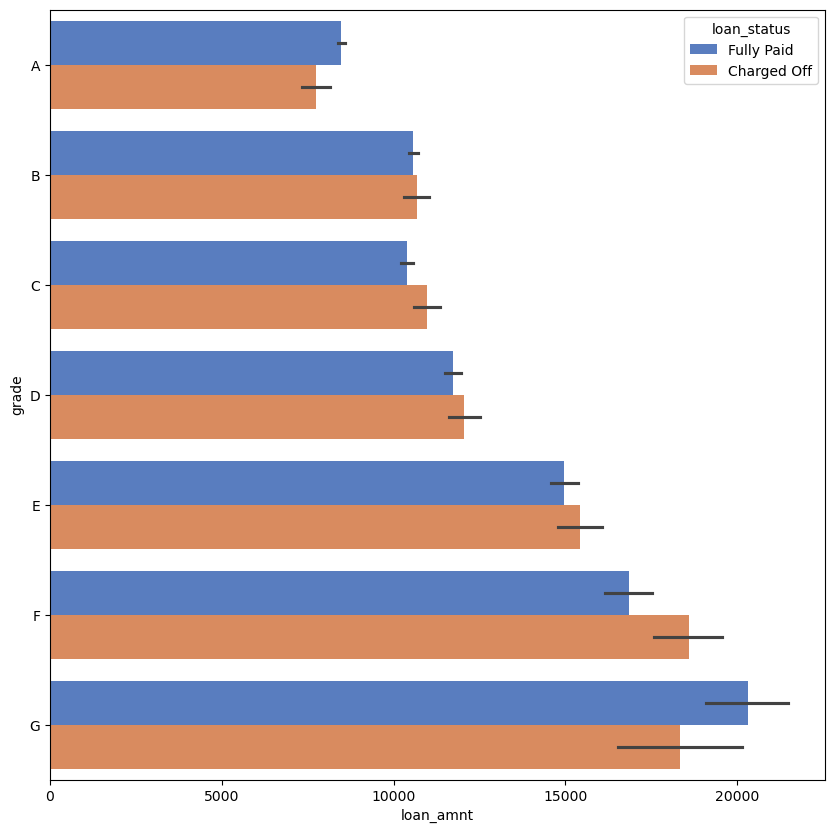

In [79]:
# Loan amount vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="muted", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

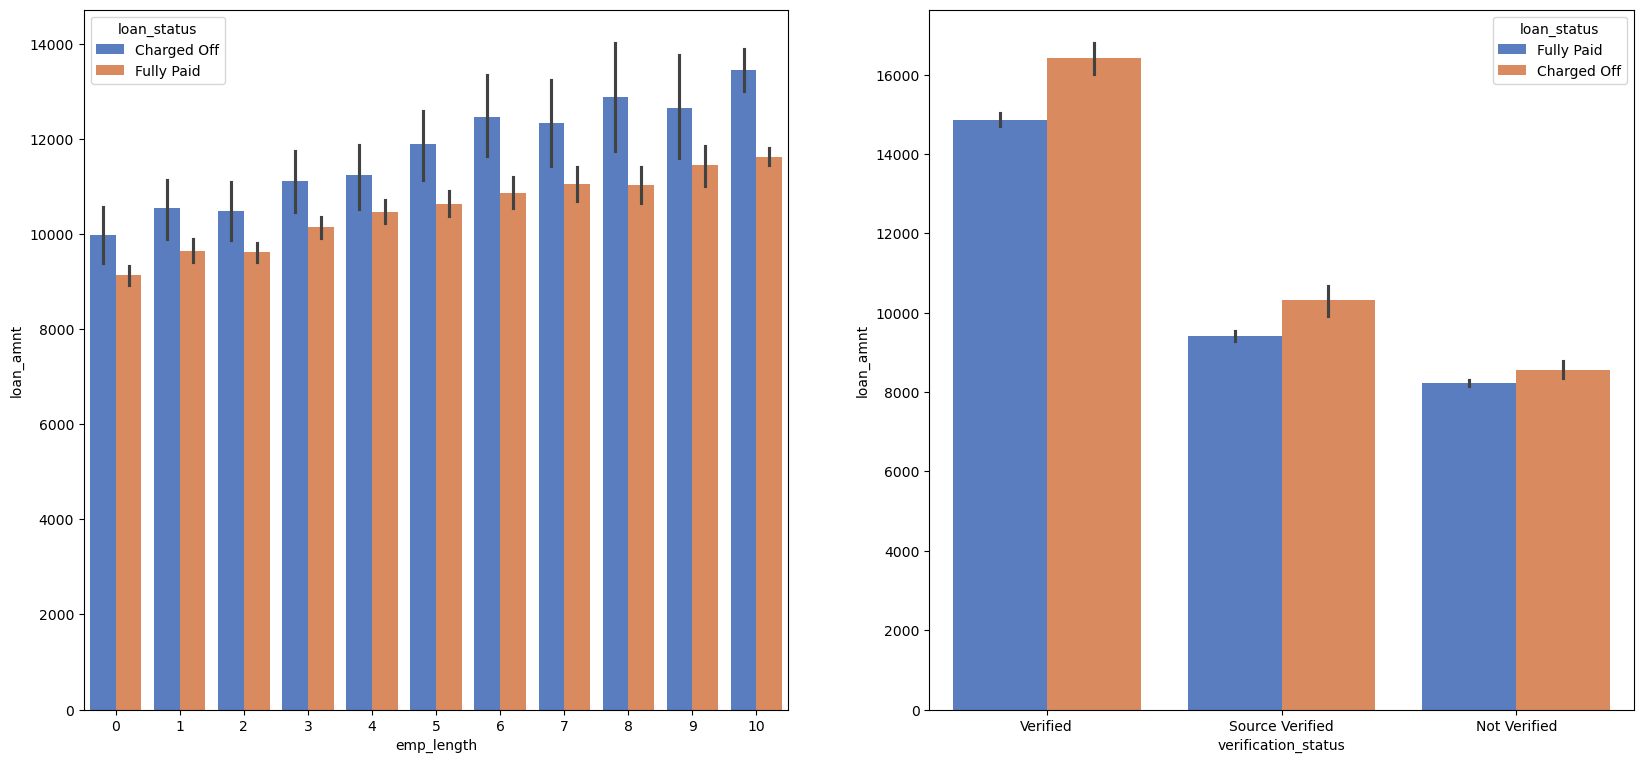

In [80]:
# Loan amount vs Emp-Length and Verification Status

plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="muted")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="muted")


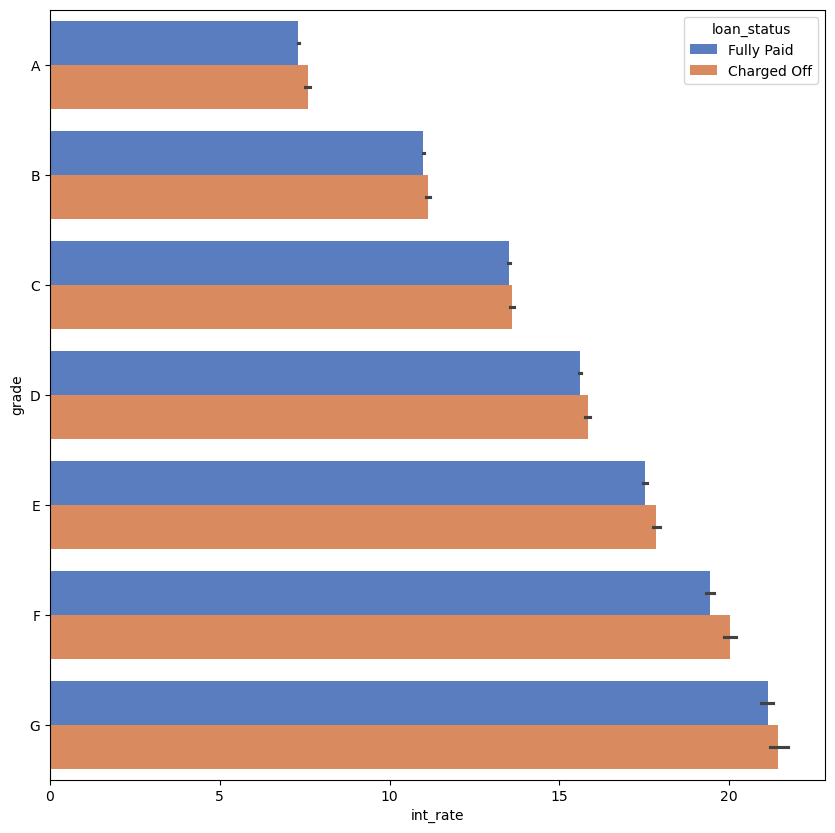

In [81]:
# Grade vs interest rate

plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="muted", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 2000x2000 with 0 Axes>

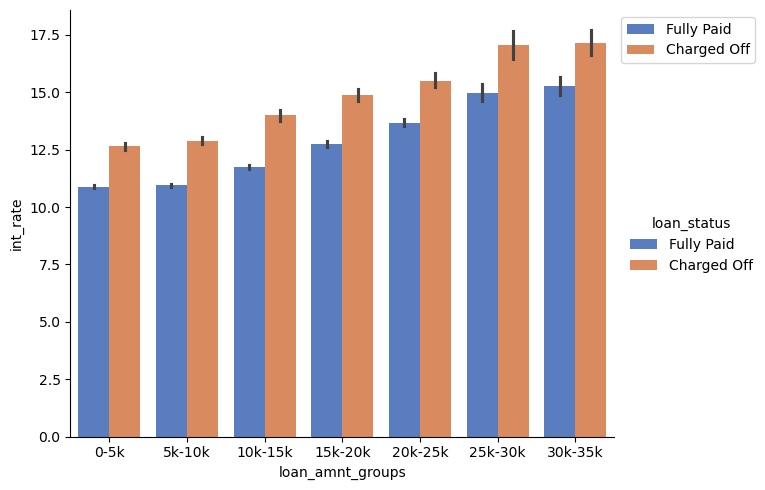

In [82]:
plt.figure(figsize=(20,20))
sns.catplot(data=loan_data, y='int_rate', x='loan_amnt_groups', hue='loan_status', palette="muted", kind='bar')
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

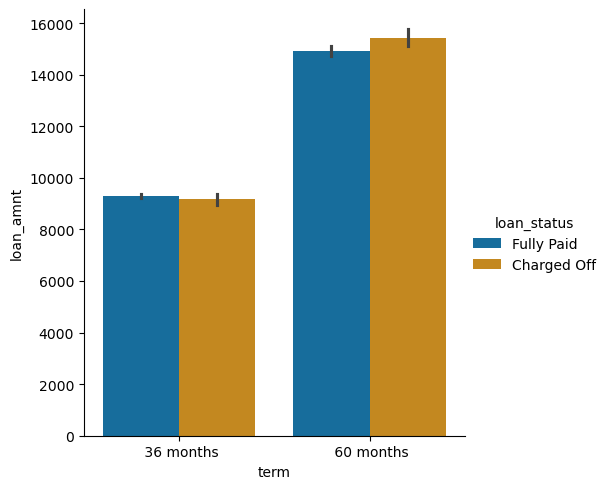

In [83]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')
plt.show()

# Observations

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who are in income group of 112k-140k and loan range around 17500
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 25k-30k  & 30k - 35k and are charged interest rate of 15-17.5 % (Slight difference)
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of near 14k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k
- Employees with longer emp_length got the loan approved for a higher amount. 
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%
-Vverified loan applications tend to have higher loan amount. Whict indicatse that the firms are first verifying the loans with higher values
- The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. this can be a driving factor for loan defaulting.
- Applicants applying for long term has applied for more loan.

.


<Figure size 2000x2000 with 0 Axes>

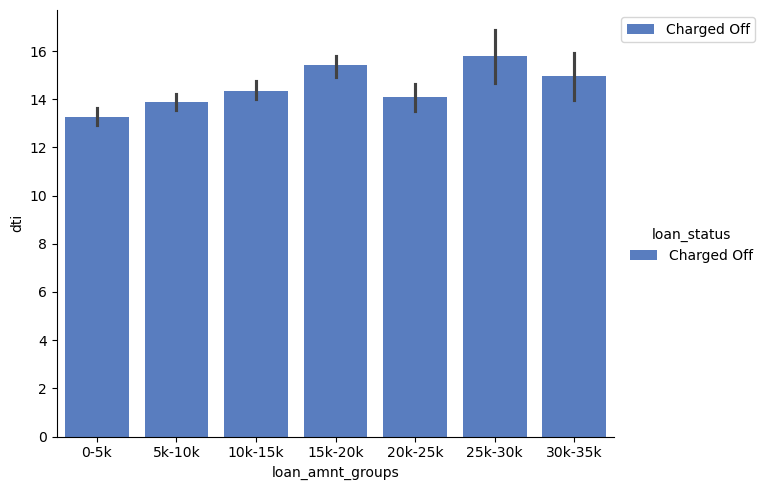

In [84]:
plt.figure(figsize=(20,20))
sns.catplot(data=loan_data[loan_data['loan_status']=='Charged Off'], y='dti', x='loan_amnt_groups', hue='loan_status', palette="muted", kind='bar')
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 2000x2000 with 0 Axes>

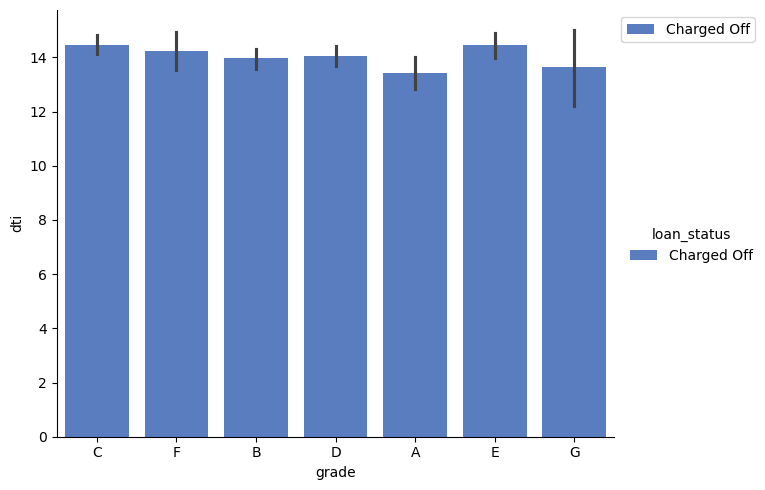

In [85]:
plt.figure(figsize=(20,20))
sns.catplot(data=loan_data[loan_data['loan_status']=='Charged Off'], y='dti', x='grade', hue='loan_status', palette="muted", kind='bar')
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 2000x2000 with 0 Axes>

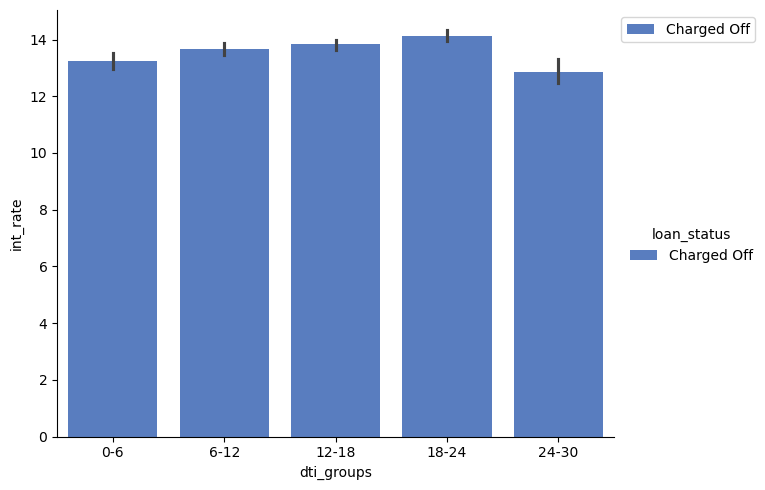

In [86]:
plt.figure(figsize=(20,20))
sns.catplot(data=loan_data[loan_data['loan_status']=='Charged Off'], y='int_rate', x='dti_groups', hue='loan_status', palette="muted", kind='bar')
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [91]:
import sys
print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)


Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.26.4
Pandas version: 2.1.4
Matplotlib version: 3.8.0
Seaborn version: 0.13.2
